In [ ]:
# # Install necessary libraries (if not already installed)
# !pip install torch torchvision
# !pip install plotly

# # Import necessary libraries
# import pandas as pd
# import cv2
# from tqdm.auto import tqdm
# import plotly.express as px
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# import numpy as np
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms, models
# from PIL import Image
# import torch
# import torch.nn as nn
# import torch.optim as optim



# # Set device
# # if torch.backends.mps.is_available():
# #     device = "mps"  
# # elif torch.cuda.is_available():
# #     device = "cuda"
# # else:
# #     device = "cpu"

# # If you want to force the device to be CPU, uncomment the following line
# device =  "cpu"

# print(f"Using device: {device}")

# # Paths and data loading
# IMAGE_PATH = "Data/images/"
# TRAIN_PATH = "Data/train.csv"
# TEST_PATH = "Data/test.csv"

# train_data = pd.read_csv(TRAIN_PATH)
# test_data = pd.read_csv(TEST_PATH)

# # Add the image path column to the DataFrame
# def image_full_path(image_id):
#     return f"{IMAGE_PATH}{image_id}.jpg"

# train_data["img_path"] = train_data["image_id"].apply(image_full_path)
# test_data["img_path"] = test_data["image_id"].apply(image_full_path)


# # Prepare labels and image paths
# train_paths = train_data['img_path'].values
# train_labels = np.argmax(train_data.loc[:, 'healthy':'scab'].values, axis=1)

# # Split data into training and validation
# train_paths, valid_paths, train_labels, valid_labels = train_test_split(
#     train_paths, train_labels, test_size=0.15, random_state=2020)


# # Define the custom dataset class
# class CustomImageDataset(Dataset):
#     def __init__(self, image_paths, labels, transform=None):
#         self.image_paths = image_paths
#         self.labels = labels
#         self.transform = transform

#     def __len__(self):
#         return len(self.image_paths)

#     def __getitem__(self, idx):
#         img_path = self.image_paths[idx]
#         image = Image.open(img_path).convert('RGB')
#         if self.transform:
#             image = self.transform(image)
#         label = self.labels[idx]
#         return image, torch.tensor(label, dtype=torch.long)

# # Define image transformations
# image_size = (224, 224)
# transformations = transforms.Compose([
#     transforms.Resize(image_size),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# # DataLoader setup
# batch_size = 32
# train_dataset = CustomImageDataset(train_paths, train_labels, transform=transformations)
# valid_dataset = CustomImageDataset(valid_paths, valid_labels, transform=transformations)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
# valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

# # Define the model
# class CustomDenseNet(nn.Module):
#     def __init__(self, num_classes=4):  # Adjust num_classes as per your dataset
#         super(CustomDenseNet, self).__init__()
#         densenet = models.densenet121(pretrained=True)
#         self.features = densenet.features
#         self.classifier = nn.Sequential(
#             nn.AdaptiveAvgPool2d((1, 1)),
#             nn.Flatten(),
#             nn.Linear(1024, num_classes)
#         )
        
#     def forward(self, x):
#         x = self.features(x)
#         x = self.classifier(x)
#         return x

# model = CustomDenseNet(num_classes=4).to(device)


# # Define the validation function
# def validate_model(model, valid_loader, criterion, device):
#     model.eval()
#     total_loss = 0
#     correct = 0
#     total = 0
#     criterion = nn.CrossEntropyLoss()
#     with torch.no_grad():
#         for inputs, labels in valid_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             total_loss += loss.item() 
#             _, predicted = torch.max(outputs.data, -1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
#     avg_loss = total_loss / len(valid_loader)
#     accuracy = correct / total
#     return avg_loss, accuracy


# # Define the training function
# def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs, device):
#     print(f"Starting training for {num_epochs} epochs.")
#     history = {
#         'train_loss': [],
#         'valid_loss': [],
#         'valid_accuracy': []
#     }
#     for epoch in range(num_epochs):
#         model.train()
#         total_loss = 0
#         progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f'Epoch {epoch+1}', leave=True)
        
#         for batch_idx, (inputs, labels) in progress_bar:
#             inputs, labels = inputs.to(device), labels.to(device)
            
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             total_loss += loss.item()
#             progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})
        
#         average_loss = total_loss / len(train_loader)
#         print(f"Epoch {epoch+1} completed. Average Loss: {average_loss}")

#         valid_loss, valid_accuracy = validate_model(model, valid_loader, criterion, device)
#         history['train_loss'].append(average_loss)
#         history['valid_loss'].append(valid_loss)
#         history['valid_accuracy'].append(valid_accuracy)
#         print(f'Validation Loss: {valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.4f}')
    
#     print("Training completed.")
#     return history

# # Main script
# if __name__ == '__main__':
#     criterion = nn.CrossEntropyLoss()  
#     optimizer = optim.Adam(model.parameters(), lr=0.001)

#     model.to(device)
#     history = train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=15, device=device)


Using device: cpu
Starting training for 15 epochs.


/opt/anaconda3/envs/mynewenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/mynewenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 1 completed. Average Loss: 0.4714117995938476
Validation Loss: 0.3410, Validation Accuracy: 0.8759


Epoch 2:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 2 completed. Average Loss: 0.23773544372952715
Validation Loss: 0.2808, Validation Accuracy: 0.8905


Epoch 3:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 3 completed. Average Loss: 0.22666184763823236
Validation Loss: 0.2658, Validation Accuracy: 0.8978


Epoch 4:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 4 completed. Average Loss: 0.19421669614634343
Validation Loss: 0.2759, Validation Accuracy: 0.8905


Epoch 5:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 5 completed. Average Loss: 0.10974955037996477
Validation Loss: 0.2702, Validation Accuracy: 0.9088


Epoch 6:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 6 completed. Average Loss: 0.09814286880119115
Validation Loss: 0.7449, Validation Accuracy: 0.8102


Epoch 7:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 7 completed. Average Loss: 0.11551175868062645
Validation Loss: 1.4440, Validation Accuracy: 0.6314


Epoch 8:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 8 completed. Average Loss: 0.13940323357071197
Validation Loss: 0.2693, Validation Accuracy: 0.9197


Epoch 9:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 9 completed. Average Loss: 0.09654161913738567
Validation Loss: 0.7072, Validation Accuracy: 0.7774


Epoch 10:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 10 completed. Average Loss: 0.14330268493492385
Validation Loss: 0.4785, Validation Accuracy: 0.9015


Epoch 11:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 11 completed. Average Loss: 0.07991026210769707
Validation Loss: 0.2747, Validation Accuracy: 0.9307


Epoch 12:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 12 completed. Average Loss: 0.07333049618125874
Validation Loss: 0.3408, Validation Accuracy: 0.9197


Epoch 13:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 13 completed. Average Loss: 0.038880320878851474
Validation Loss: 0.2834, Validation Accuracy: 0.9416


Epoch 14:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 14 completed. Average Loss: 0.08832887346305106
Validation Loss: 0.4174, Validation Accuracy: 0.8832


Epoch 15:   0%|          | 0/49 [00:00<?, ?it/s]

Epoch 15 completed. Average Loss: 0.051656202599643826
Validation Loss: 0.2566, Validation Accuracy: 0.9307
Training completed.


In [ ]:
# # To save model state, optimizer state, and epoch number
# torch.save({
#     'model_state_dict': model.state_dict(),
#     'optimizer_state_dict': optimizer.state_dict(),
# }, 'denseNet.pth')

In [ ]:
# # Load a checkpoint
# checkpoint = torch.load('denseNet.pth')
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])


# # Move model to the right device (if using GPU)
# model.to(device)

CustomDenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

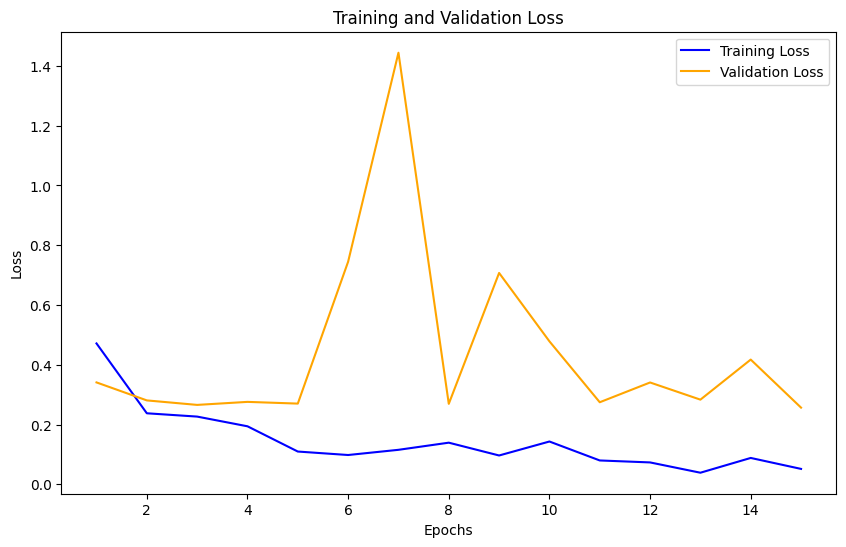

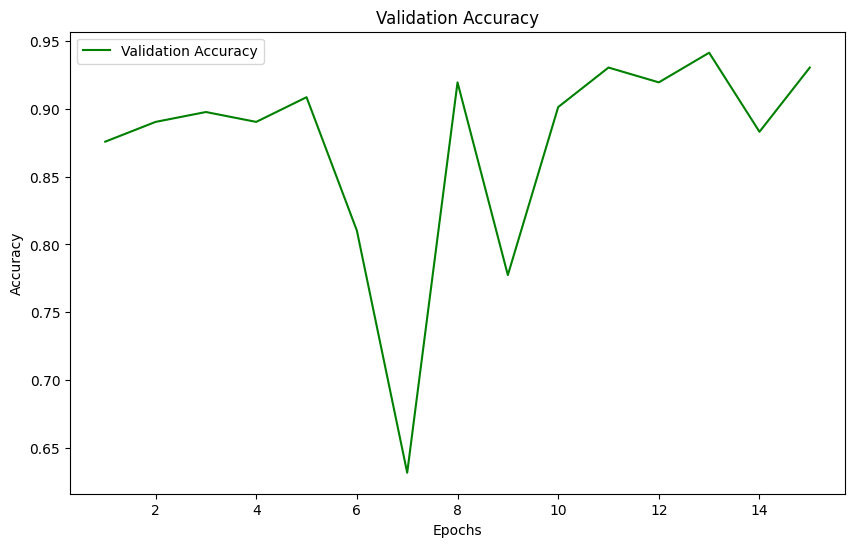

In [ ]:
# import matplotlib.pyplot as plt

# def plot_training_history(history):
#     epochs = range(1, len(history['train_loss']) + 1)
    
#     # Plot both training and validation loss on the same plot
#     plt.figure(figsize=(10, 6))
#     plt.plot(epochs, history['train_loss'], label='Training Loss', color='blue')
#     plt.plot(epochs, history['valid_loss'], label='Validation Loss', color='orange')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.title('Training and Validation Loss')
#     plt.legend()
#     plt.show()
    
#     # Plot validation accuracy
#     plt.figure(figsize=(10, 6))
#     plt.plot(epochs, history['valid_accuracy'], label='Validation Accuracy', color='green')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.title('Validation Accuracy')
#     plt.legend()
#     plt.show()

# # Call the plotting function with the history
# plot_training_history(history)

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cv2
import numpy as np

# Function to preprocess the image and make a prediction
def process_image(img_path):
    image = Image.open(img_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device
    return image

# Function to get prediction probabilities for an image
def predict(img_path):
    model.eval()
    with torch.no_grad():
        processed_img = process_image(img_path)
        preds = model(processed_img)
        preds = torch.softmax(preds, dim=1).cpu().numpy().flatten()  # Softmax for probabilities
    return preds

# Setup the subplot structure
fig = make_subplots(rows=4, cols=2, subplot_titles=("Image 1", "Predictions 1", "Image 2", "Predictions 2",
                                                    "Image 3", "Predictions 3", "Image 4", "Predictions 4"))

# Labels for the classes
classes = ["Healthy", "Multiple diseases", "Rust", "Scab"]

# Define colors for predictions
base_colors = {"Healthy": px.colors.qualitative.Plotly[0], "Multiple diseases": px.colors.qualitative.Plotly[1],
               "Rust": px.colors.qualitative.Plotly[2], "Scab": px.colors.qualitative.Plotly[3]}

# Select some images from the training set
sample_images = [train_paths[i] for i in [0, 1, 2, 3]]

# Loop through selected images and add them to the figure
for i, img_path in enumerate(sample_images):
    preds = predict(img_path)
    pred_class = classes[np.argmax(preds)]

    # Highlight the predicted class
    colors = [base_colors[cls] if cls != pred_class else px.colors.qualitative.Plotly[4] for cls in classes]

    # Image subplot
    img_cv = cv2.imread(img_path)
    img_resized = cv2.resize(img_cv, (205, 136))[:, :, ::-1]  # Convert BGR to RGB for display
    fig.add_trace(go.Image(z=img_resized), row=(i + 1), col=1)

    # Prediction bar chart subplot
    fig.add_trace(go.Bar(x=classes, y=preds, marker=dict(color=colors)), row=(i + 1), col=2)

# Update layout
fig.update_layout(height=1200, width=800, title_text="Predictions for Selected Images", showlegend=False)
fig.show()

In [10]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from tqdm.auto import tqdm  # Import tqdm for progress bar

# Assuming `test_data` contains a column 'img_path' for the test images
class TestDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Define transformations similar to training
test_transformations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load test images
test_dataset = TestDataset(test_data['img_path'].values, transform=test_transformations)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Function to make predictions with progress bar
def predict(model, dataloader, device):
    model.eval()
    predictions = []
    with torch.no_grad():
        for images in tqdm(dataloader, desc="Predicting", unit="batch"):  # Add progress bar here
            images = images.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
            predictions.extend(probs.cpu().numpy())  # Move to CPU and convert to NumPy for easier handling
    return predictions

# Run predictions with progress tracking
predictions = predict(model, test_loader, device)

# Create a DataFrame for submission
sub = pd.DataFrame(predictions, columns=['healthy', 'multiple_diseases', 'rust', 'scab'])
sub['image_id'] = test_data['image_id']  # Assuming 'image_id' column exists in test_data
sub = sub[['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab']]  # Arrange columns as required

# Save to CSV
sub.to_csv('submission_efn.csv', index=False)
print(sub.head())

Predicting:   0%|          | 0/57 [00:00<?, ?batch/s]

  image_id       healthy  multiple_diseases          rust          scab
0   Test_0  7.741254e-08       4.591406e-04  9.993306e-01  2.102028e-04
1   Test_1  1.422465e-03       1.777198e-05  9.886131e-01  9.946560e-03
2   Test_2  8.594494e-10       4.959454e-11  7.071954e-11  1.000000e+00
3   Test_3  9.999963e-01       6.182757e-07  1.973669e-06  1.030415e-06
4   Test_4  2.934597e-12       3.667059e-09  1.000000e+00  1.732616e-09


In [17]:
! pip install --upgrade torch torchvision

  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 43.6 MB/s eta 0:00:0000:0100:01
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.0
    Uninstalling sympy-1.13.0:
      Successfully uninstalled sympy-1.13.0
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling torch-2.0.1:
      Successfully uninstalled torch-2.0.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.2
    Uninstalling torchvision-0.15.2:
      Successfully uninstalled torchvision-0.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2 requires torch==2.0.1, but you have torch 2.

In [18]:
import torch
print("MPS available:", torch.backends.mps.is_available())

a = torch.randn(2, 2, device="mps")
b = torch.randn(2, 2, device="mps")
c = a + b
print(c)

MPS available: True
tensor([[-1.4231,  0.3244],
        [ 0.4231, -0.0781]], device='mps:0')


In [20]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
tensor = torch.rand(10, 10, device=device)
print(f"Tensor on {device}: {tensor}")

Tensor on mps: tensor([[9.5743e-01, 2.7599e-02, 5.2916e-03, 1.4572e-01, 4.2482e-01, 4.5721e-01,
         1.8942e-01, 7.2759e-01, 6.5782e-01, 9.6464e-01],
        [8.8816e-01, 6.1092e-01, 2.7719e-01, 5.7176e-01, 6.1620e-02, 8.9254e-01,
         1.1849e-01, 9.9815e-01, 2.6298e-04, 1.0825e-01],
        [9.5511e-01, 1.2124e-01, 2.6189e-01, 4.8070e-01, 8.3259e-01, 6.6534e-01,
         9.0875e-01, 3.0825e-01, 9.6806e-01, 4.0571e-01],
        [9.7391e-01, 9.2543e-03, 2.4878e-02, 7.6942e-01, 9.4700e-01, 3.5028e-01,
         8.6894e-01, 8.0211e-01, 5.1193e-01, 9.5989e-01],
        [2.2021e-01, 5.9447e-01, 8.6798e-01, 4.6749e-01, 9.2515e-01, 5.3139e-01,
         2.0932e-03, 2.6422e-01, 8.1046e-01, 3.0747e-01],
        [6.0472e-01, 9.2417e-01, 7.2679e-01, 5.1667e-01, 7.1773e-01, 8.0050e-01,
         6.9481e-01, 9.1363e-01, 9.9143e-01, 2.3782e-01],
        [9.1392e-01, 6.2043e-01, 5.9981e-01, 4.7772e-01, 9.5185e-02, 7.7172e-01,
         8.1494e-01, 1.0299e-01, 6.1317e-01, 5.7580e-01],
        [2.6

In [14]:
# Install necessary libraries (if not already installed)
!pip install torch torchvision
!pip install plotly

# Import necessary libraries
import pandas as pd
import cv2
from tqdm.auto import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim




if torch.backends.mps.is_available():
    device = "mps"  
elif torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

# # If you want to force the device to be CPU, uncomment the following line
# device = device = "mps" if torch.backends.mps.is_available() else "cpu"

print(f"Using device: {device}")

# Paths and data loading
IMAGE_PATH = "Data/images/"
TRAIN_PATH = "Data/train.csv"
TEST_PATH = "Data/test.csv"

train_data = pd.read_csv(TRAIN_PATH)
test_data = pd.read_csv(TEST_PATH)

# Add the image path column to the DataFrame
def image_full_path(image_id):
    return f"{IMAGE_PATH}{image_id}.jpg"

train_data["img_path"] = train_data["image_id"].apply(image_full_path)
test_data["img_path"] = test_data["image_id"].apply(image_full_path)


# Prepare labels and image paths
train_paths = train_data['img_path'].values
train_labels = np.argmax(train_data.loc[:, 'healthy':'scab'].values, axis=1)

# Split data into training and validation
train_paths, valid_paths, train_labels, valid_labels = train_test_split(
    train_paths, train_labels, test_size=0.15, random_state=2020)


# Define the custom dataset class
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, torch.tensor(label, dtype=torch.long)

# Define image transformations
image_size = (224, 224)
transformations = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# DataLoader setup
batch_size = 4
train_dataset = CustomImageDataset(train_paths, train_labels, transform=transformations)
valid_dataset = CustomImageDataset(valid_paths, valid_labels, transform=transformations)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

# Define the model
class CustomDenseNet(nn.Module):
    def __init__(self, num_classes=4):  # Adjust num_classes as per your dataset
        super(CustomDenseNet, self).__init__()
        densenet = models.densenet121(pretrained=True)
        self.features = densenet.features
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1024, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = CustomDenseNet(num_classes=4).to(device)


# Define the validation function
def validate_model(model, valid_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() 
            _, predicted = torch.max(outputs.data, -1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    avg_loss = total_loss / len(valid_loader)
    accuracy = correct / total
    return avg_loss, accuracy


# Define the training function
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs, device):
    print(f"Starting training for {num_epochs} epochs.")
    history = {
        'train_loss': [],
        'valid_loss': [],
        'valid_accuracy': []
    }
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f'Epoch {epoch+1}', leave=True)
        
        for batch_idx, (inputs, labels) in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})
        
        average_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1} completed. Average Loss: {average_loss}")

        valid_loss, valid_accuracy = validate_model(model, valid_loader, criterion, device)
        history['train_loss'].append(average_loss)
        history['valid_loss'].append(valid_loss)
        history['valid_accuracy'].append(valid_accuracy)
        print(f'Validation Loss: {valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.4f}')
    
    print("Training completed.")
    return history

# Main script
if __name__ == '__main__':
    criterion = nn.CrossEntropyLoss()  
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.to(device)
    history = train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=15, device=device)


Using device: mps


/opt/anaconda3/envs/mynewenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/mynewenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting training for 15 epochs.


Epoch 1:   0%|          | 0/387 [00:00<?, ?it/s]

Epoch 1 completed. Average Loss: 1.011822591870253
Validation Loss: 0.5572, Validation Accuracy: 0.8102


Epoch 2:   0%|          | 0/387 [00:00<?, ?it/s]

KeyboardInterrupt: 

{'train_loss': [0.9246711199982838, 0.7922872095838074, 0.6896333931788841, 0.6148546539218158, 0.5635006348975484, 0.5265596433054146, 0.4526180871774368, 0.4809338186412703, 0.43844160984104225, 0.4126153121719219, 0.37839572262127213, 0.32394289785336694, 0.3765114752277347, 0.32025957249167547, 0.2906651488049269], 'valid_loss': [0.5234287107984225, 0.5937988183636597, 0.3783297727923786, 0.48655632816498046, 0.3898021066426367, 0.42189717973056046, 0.36751454552986484, 0.29865138887333265, 0.41825020801869855, 0.3250266829019655, 0.4151219259812564, 0.4367319948674328, 0.3118245009926782, 0.34064724861873663, 0.2712857826761361], 'valid_accuracy': [0.8138686131386861, 0.8357664233576643, 0.8540145985401459, 0.8321167883211679, 0.8905109489051095, 0.8722627737226277, 0.8978102189781022, 0.8978102189781022, 0.8503649635036497, 0.9087591240875912, 0.8868613138686131, 0.8832116788321168, 0.9233576642335767, 0.8832116788321168, 0.8978102189781022]}


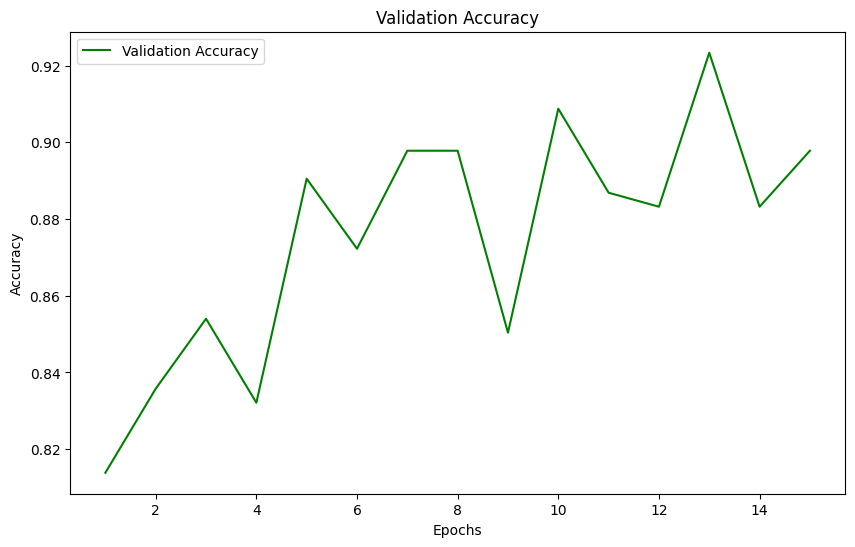

In [6]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    epochs = range(1, len(history['train_loss']) + 1)
    
    # Plot both training and validation loss on the same plot
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, history['train_loss'], label='Training Loss', color='blue')
    plt.plot(epochs, history['valid_loss'], label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
    # Plot validation accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, history['valid_accuracy'], label='Validation Accuracy', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()
    plt.show()

# Call the plotting function with the history
plot_training_history(history)

In [7]:
final_model_path = 'final_model_checkpoint.pth'
torch.save({
        'epoch': 15,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_loss': history['train_loss'][-1],
        'valid_loss': history['valid_loss'][-1],
        'valid_accuracy': history['valid_accuracy'][-1],
    }, final_model_path)
print(f"Final model saved to {final_model_path}")

Final model saved to final_model_checkpoint.pth


In [18]:
import torch
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
from tqdm.auto import tqdm  # Import tqdm for progress bar

# Define the model architecture again, same as during training
class CustomDenseNet(nn.Module):
    def __init__(self, num_classes=4):  # Adjust num_classes as per your dataset
        super(CustomDenseNet, self).__init__()
        densenet = models.densenet121(pretrained=True)
        self.features = densenet.features
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1024, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Load the model checkpoint
# if torch.backends.mps.is_available() == "True":
#     device = "mps"
# elif torch.cuda.is_available():
#     device = "cuda"
# else:
#     device = "cpu"

device = "cpu"

print(f"Using device: {device}")    

model = CustomDenseNet(num_classes=4).to(device)
print(model)

checkpoint_path = 'model/final_model_checkpoint.pth'  # Path to your saved model
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)



# # Save to CSV
# sub.to_csv('submission_efn.csv', index=False)
# print(sub.head())

Using device: cpu


/opt/anaconda3/envs/mynewenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/mynewenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


CustomDenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

/var/folders/4j/f9p0tjqj1ql3bytxkr213dn40000gn/T/ipykernel_84265/1371177595.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map

CustomDenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [19]:
# Assuming `test_data` from a DataFrame that includes paths and potential 'image_id'
class TestDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Define transformations similar to training
test_transformations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load test images
test_dataset = TestDataset(test_data['img_path'].values, transform=test_transformations)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Prediction function
def predict(model, dataloader, device):
    model.eval()
    predictions = []
    with torch.no_grad():
        for images in tqdm(dataloader, desc="Predicting", unit="batch"):
            images = images.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
            predictions.extend(probs.cpu().numpy())  # Move to CPU and convert to NumPy for easier handling
    return predictions

# Run predictions with progress tracking
predictions = predict(model, test_loader, device)

# Create a DataFrame for submission
sub = pd.DataFrame(predictions, columns=['healthy', 'multiple_diseases', 'rust', 'scab'])
sub['image_id'] = test_data['image_id']  # Assuming 'image_id' column exists in test_data
sub = sub[['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab']]  # Arrange columns as required
print(sub.head())

Predicting:   0%|          | 0/456 [00:00<?, ?batch/s]

  image_id   healthy  multiple_diseases      rust      scab
0   Test_0  0.000664           0.074356  0.923456  0.001524
1   Test_1  0.012527           0.020371  0.964794  0.002308
2   Test_2  0.020005           0.003328  0.001271  0.975396
3   Test_3  0.992289           0.002068  0.000162  0.005482
4   Test_4  0.000007           0.003217  0.996768  0.000008


In [20]:
# Save to CSV
sub.to_csv('submission_dns_model_2.csv', index=False)
print(sub.head())

  image_id   healthy  multiple_diseases      rust      scab
0   Test_0  0.000664           0.074356  0.923456  0.001524
1   Test_1  0.012527           0.020371  0.964794  0.002308
2   Test_2  0.020005           0.003328  0.001271  0.975396
3   Test_3  0.992289           0.002068  0.000162  0.005482
4   Test_4  0.000007           0.003217  0.996768  0.000008


In [ ]:
# Install necessary libraries (if not already installed)
!pip install torch torchvision
!pip install plotly

# Import necessary libraries
import pandas as pd
import cv2
from tqdm.auto import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim



# Set device
if torch.backends.mps.is_available():
    device = "mps"  
elif torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

# If you want to force the device to be CPU, uncomment the following line
# device =  "cpu"

print(f"Using device: {device}")

# Paths and data loading
IMAGE_PATH = "Data/images/"
TRAIN_PATH = "Data/train.csv"
TEST_PATH = "Data/test.csv"

train_data = pd.read_csv(TRAIN_PATH)
test_data = pd.read_csv(TEST_PATH)

# Add the image path column to the DataFrame
def image_full_path(image_id):
    return f"{IMAGE_PATH}{image_id}.jpg"

train_data["img_path"] = train_data["image_id"].apply(image_full_path)
test_data["img_path"] = test_data["image_id"].apply(image_full_path)


# Prepare labels and image paths
train_paths = train_data['img_path'].values
train_labels = np.argmax(train_data.loc[:, 'healthy':'scab'].values, axis=1)

# Split data into training and validation
train_paths, valid_paths, train_labels, valid_labels = train_test_split(
    train_paths, train_labels, test_size=0.15, random_state=2020)


# Define the custom dataset class
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, torch.tensor(label, dtype=torch.long)

train_transformations = transforms.Compose([
    transforms.Resize((448, 448)),  # Resize all images to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomVerticalFlip(),  # Randomly flip images vertically
    transforms.RandomRotation(15),  # Randomly rotate images within a specified degree range
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),  # Randomly jitter brightness, contrast, and saturation
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),  # Randomly apply Gaussian blur
    transforms.ToTensor(),  # Convert images to tensor format
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

valid_transformations = transforms.Compose([
    transforms.Resize((448, 448)),  # Resize all images to 224x224 for validation
    transforms.ToTensor(),  # Convert images to tensor format
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# DataLoader setup
batch_size = 8
train_dataset = CustomImageDataset(train_paths, train_labels, transform=train_transformations)
valid_dataset = CustomImageDataset(valid_paths, valid_labels, transform=valid_transformations)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

# Define the model
class CustomDenseNet(nn.Module):
    def __init__(self, num_classes=4):  # Adjust num_classes as per your dataset
        super(CustomDenseNet, self).__init__()
        densenet = models.densenet121(pretrained=True)
        self.features = densenet.features
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1024, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = CustomDenseNet(num_classes=4).to(device)


# Define the validation function
def validate_model(model, valid_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() 
            _, predicted = torch.max(outputs.data, -1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    avg_loss = total_loss / len(valid_loader)
    accuracy = correct / total
    return avg_loss, accuracy


# Define the training function
def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs, device):
    print(f"Starting training for {num_epochs} epochs.")
    history = {
        'train_loss': [],
        'valid_loss': [],
        'valid_accuracy': []
    }
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f'Epoch {epoch+1}', leave=True)
        
        for batch_idx, (inputs, labels) in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})
        
        average_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1} completed. Average Loss: {average_loss}")

        valid_loss, valid_accuracy = validate_model(model, valid_loader, criterion, device)
        history['train_loss'].append(average_loss)
        history['valid_loss'].append(valid_loss)
        history['valid_accuracy'].append(valid_accuracy)
        print(f'Validation Loss: {valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.4f}')
    
    print("Training completed.")
    return history

# Main script
if __name__ == '__main__':
    criterion = nn.CrossEntropyLoss()  
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.to(device)
    history = train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=15, device=device)


Using device: cpu
Starting training for 15 epochs.


/opt/anaconda3/envs/mynewenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/mynewenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1:   0%|          | 0/194 [00:00<?, ?it/s]

KeyboardInterrupt: 